<a href="https://colab.research.google.com/github/gowthambalachandhiran/Sentiment-Analysis-interpretation/blob/master/UpdatedExplanationWithDeepleraning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [1]:
!pip install lime

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for lime: filename=lime-0.1.1.37-cp36-none-any.whl size=284277 sha256=4bc7d6ffcecdcd317b9d16b7f246cf6d825fa127483287aafc944fc6197ed387
  Stored in directory: /root/.cache/pip/wheels/c1/38/e7/50d75d4fb75afa604570dc42f20c5c5f5ab26d3fbe8d6ef27b
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12073 sha256=e91350e0b82cc4cfe44ae5fe818efc5168c7918ff3ddbee31a1a730e28689e4b
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built lime progressbar


In [0]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle
from __future__ import print_function
from io import StringIO
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [0]:
df = pd.read_csv('/content/sample_data/stack-overflow-data.csv')
df = df[pd.notnull(df['tags'])]

In [0]:
df['class_label'] = df['tags'].factorize()[0]

In [0]:
class_label_df = df[['tags', 'class_label']].drop_duplicates().sort_values('class_label')
label_to_id = dict(class_label_df.values)
id_to_label = dict(class_label_df[['class_label', 'tags']].values)

In [6]:
!nltk.download('all')

/bin/bash: -c: line 0: syntax error near unexpected token `'all''
/bin/bash: -c: line 0: `nltk.download('all')'


In [7]:
id_to_label

{0: 'c#',
 1: 'asp.net',
 2: 'objective-c',
 3: '.net',
 4: 'python',
 5: 'angularjs',
 6: 'iphone',
 7: 'ruby-on-rails',
 8: 'ios',
 9: 'c',
 10: 'sql',
 11: 'java',
 12: 'jquery',
 13: 'css',
 14: 'c++',
 15: 'php',
 16: 'android',
 17: 'mysql',
 18: 'javascript',
 19: 'html'}

In [8]:
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding. BeautifulSoup's text attribute will return a string stripped of any HTML tags and metadata.
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:

df.head()

,post,tags,class_label
0,causing behavior c# datetime type test public ...,c#,0
1,dynamic html load iframe aspnet 40 site users ...,asp.net,1
2,convert float value minsec trying convert seco...,objective-c,2
3,net framework 4 redistributable wondering get ...,.net,3
4,trying calculate print mean returning rather n...,python,4


In [0]:
list_corpus = df["post"].tolist()
list_labels = df["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', binary=True)

In [0]:
train_vectors = vectorizer.fit_transform(X_train)

In [0]:
test_vectors = vectorizer.transform(X_test)

In [13]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
pred = logreg.predict(test_vectors)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.820, precision = 0.821, recall = 0.820, f1 = 0.819


In [0]:
import pickle
filename = '/content/sample_data/finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [0]:
logreg = pickle.load(open(filename, 'rb'))

In [0]:
c = make_pipeline(vectorizer, logreg)
class_names=list(df.tags.unique())
explainer = LimeTextExplainer(class_names=class_names)

In [18]:
len(class_names)

20

In [19]:
idx = 100
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6, labels=[5, 8])
print('Document id: %d' % idx)
print('Predicted class =', class_names[logreg.predict(test_vectors[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[y_test[idx]])

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:116: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Document id: 100
Predicted class = html
True class: css


In [20]:
X_test[0]

'modify image border 1 one margin html created border around image want eliminate right left bottom stokes around image know'

In [21]:
class_names[logreg.predict(vectorizer.transform(['python is great'])).reshape(1,-1)[0,0]]

'python'

In [22]:
logreg.predict(vectorizer.transform(['python is great'])).reshape(1,-1)[0,0]

4

In [23]:
print ('Explanation for class %s' % class_names[logreg.predict(vectorizer.transform(['python is great'])).reshape(1,-1)[0,0]])
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6)



Explanation for class python


/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:116: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


In [24]:
exp = explainer.explain_instance('Python is awesome and so developer friendly', c.predict_proba,num_features=20)

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:116: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


[('Python', -0.0638874617025335), ('friendly', 0.005762214120978522), ('developer', -0.002778344777735168), ('awesome', -0.0018337006351566256), ('so', 0.00019101314932023307), ('is', 3.240854206377758e-05), ('and', -1.81112313233541e-05)]


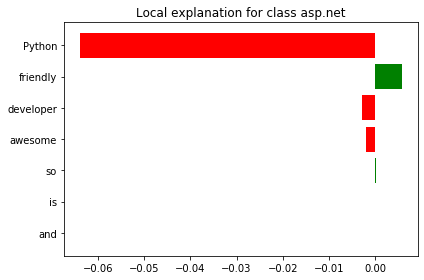

In [25]:
print(exp.as_list())
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

c#


/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:116: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


android


/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:116: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


ruby-on-rails


/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:116: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


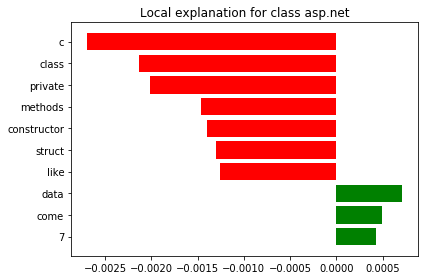

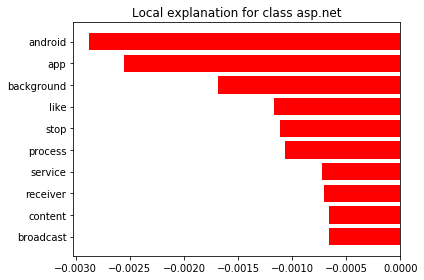

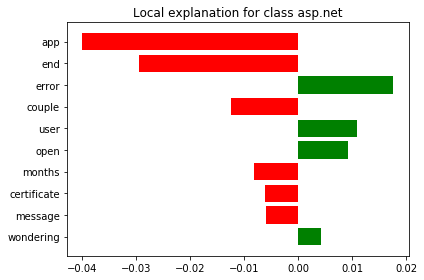

In [29]:
for i in [7, 50, 66]:
    print(class_names[logreg.predict(test_vectors[i]).reshape(1,-1)[0,0]])
    exp = explainer.explain_instance(X_test[i], c.predict_proba,
            num_features=10)
    exp.as_pyplot_figure()
    plt.tight_layout()

In [0]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [0]:
df = pd.read_csv('/content/sample_data/stack-overflow-data.csv')

In [90]:
df.head(5)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [0]:

df['post']= [x.lower() for x in df['post']]
df['post'] = df['post'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [92]:
df.dtypes

post    object
tags    object
dtype: object

In [93]:
print('Max length of column %s: %s\n' %  ('post', df['post'].map(len).max()))

Max length of column post: 28457



In [0]:
df['post']= [x.encode('ascii') for x in df['post']]

In [94]:
tokenizer = Tokenizer(nb_words=45000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
tokenizer.fit_on_texts(df['post'].values)

The `nb_words` argument in `Tokenizer` has been renamed `num_words`.


In [0]:
#tokenizer.word_index

In [0]:
maxlen = 80 
X = tokenizer.texts_to_sequences(df['post'].values)
X = pad_sequences(X,maxlen=maxlen)

In [22]:
len(df)

40000

In [58]:
max_features = 45000
maxlen = 200  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Build model...
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 128)         5760000   
_________________________________________________________________
lstm_24 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 20)                2580      
Total params: 5,894,164
Trainable params: 5,894,164
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
Y = pd.get_dummies(df['tags']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(32000, 80) (32000, 20)
(8000, 80) (8000, 20)


In [60]:
print('Train...')
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)

Train...
Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 210s 7ms/step - loss: 2.4877 - acc: 0.1706 - val_loss: 2.1106 - val_acc: 0.2806
Epoch 2/10
32000/32000 [==============================] - 205s 6ms/step - loss: 1.5741 - acc: 0.4549 - val_loss: 1.2669 - val_acc: 0.5565
Epoch 3/10
32000/32000 [==============================] - 206s 6ms/step - loss: 1.0137 - acc: 0.6595 - val_loss: 1.0221 - val_acc: 0.6753
Epoch 4/10
32000/32000 [==============================] - 207s 6ms/step - loss: 0.7573 - acc: 0.7517 - val_loss: 0.9655 - val_acc: 0.6959
Epoch 5/10
32000/32000 [==============================] - 209s 7ms/step - loss: 0.5914 - acc: 0.8094 - val_loss: 0.9530 - val_acc: 0.7117
Epoch 6/10
32000/32000 [==============================] - 209s 7ms/step - loss: 0.4550 - acc: 0.8578 - val_loss: 1.0195 - val_acc: 0.7039
Epoch 7/10
32000/32000 [==============================] - 209s 7ms/step - loss: 0.3320 - acc: 0.8988 - val_loss: 1

In [62]:
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

8000/8000 [==============================] - 7s 849us/step
Test score: 1.4236304422616959
Test accuracy: 0.6935


In [63]:
model_json = model.to_json()
with open("/content/sample_data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/sample_data/model.h5")
print("Saved model to disk")

Saved model to disk


In [65]:
!pip install shap

     |████████████████████████████████| 266kB 3.1MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383183 sha256=3da3bfa732210edbed4a91110306975a5c0b79a93f56db68b3ec7a22bd5ec263
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


In [87]:
!pip install --upgrade --quiet witwidget shap
!pip install tensorflow --upgrade

     |████████████████████████████████| 86.3MB 117kB/s 
     |████████████████████████████████| 3.8MB 46.5MB/s 
     |████████████████████████████████| 450kB 35.2MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [97]:
from keras.models import model_from_json
json_file = open('/content/sample_data/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/sample_data/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
!pip install --upgrade --quiet witwidget shap

In [0]:
import shap

attrib_data = X_train[:200]
explainer = shap.DeepExplainer(model, attrib_data)

In [0]:
num_explanations = 25
shap_vals = explainer.shap_values(X_test[:num_explanations])

In [0]:
from tensorflow.keras.preprocessing import text
class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix

In [108]:
train_size = int(len(df) * .8)
print('train size: %d' % train_size)
print('test size: %d' % (len(df) - train_size))

train size: 32000
test size: 8000


In [0]:
VOCAB_SIZE = 500
train_post = df['post'].values[: train_size]
test_post = df['post'].values[train_size: ]
processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(train_post)
X_train = processor.transform_text(train_post)
X_test = processor.transform_text(test_post)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing import text
import keras.backend.tensorflow_backend as K
K.set_session
import shap

In [115]:
tags_split = [tags.split(',') for tags in df['tags'].values]
print(tags_split[:10])

[['c#'], ['asp.net'], ['objective-c'], ['.net'], ['python'], ['asp.net'], ['angularjs'], ['iphone'], ['ruby-on-rails'], ['angularjs']]


In [116]:
tag_encoder = MultiLabelBinarizer()
tags_encoded = tag_encoder.fit_transform(tags_split)
num_tags = len(tags_encoded[0])
print(df['post'].values[0])
print(tag_encoder.classes_)
print(tags_encoded[0])

what is causing this behavior  in our c datetime type  precode[test] public void sadness     var datetime  datetimeutcnow    assertthatdatetime  isequaltodatetimeparsedatetimetostring  codepre   failed    precode expected 20111031 061244000  but was  20111031 061244350 codepre   i wish to know what is happening behind the scenes in tostring etc to cause this behavior    edit after seeing jon s answer    precode[test] public void newsadness      var datetime  datetimeutcnow     assertthatdatetime  isequaltodatetimeparsedatetimetostring o   codepre   result    precodeexpected 20111031 120304161 but was  20111031 063304161 codepre   same result with capital and small  o   i m reading up the docs  but still unclear
['.net' 'android' 'angularjs' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios'
 'iphone' 'java' 'javascript' 'jquery' 'mysql' 'objective-c' 'php'
 'python' 'ruby-on-rails' 'sql']
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


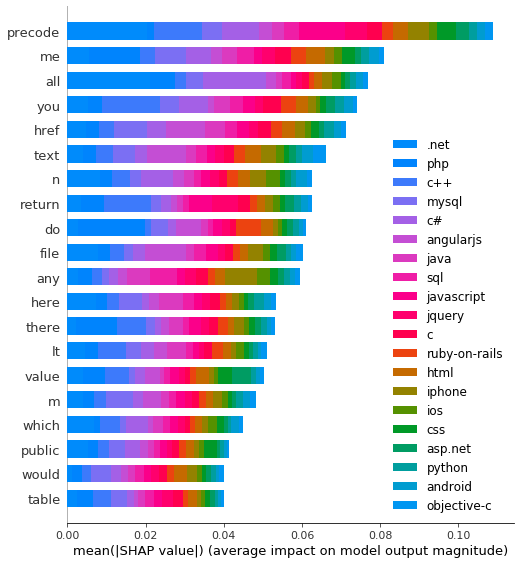

In [117]:
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
  word_lookup.append(i)

word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=tag_encoder.classes_)